1440


C:\Users\eleamk\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


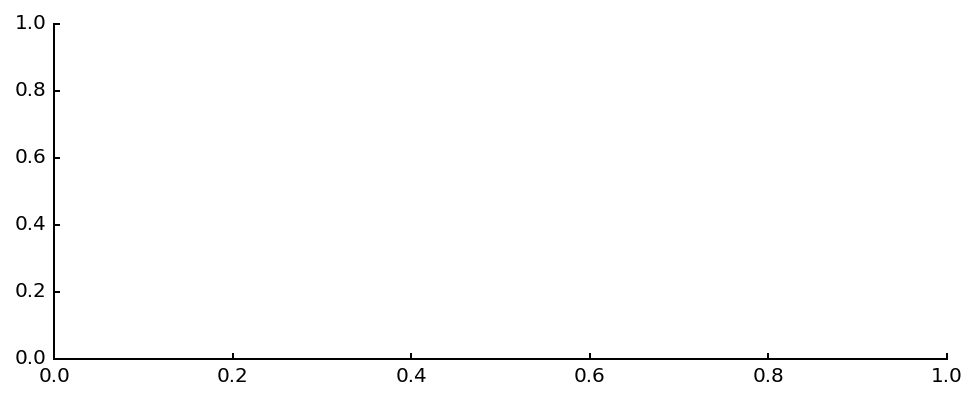

In [42]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.dates as md
import datetime as dt
%matplotlib inline
def init_plotting():
    pl.rcParams['figure.figsize'] = (8, 3)
    pl.rcParams['font.size'] = 10
    pl.rcParams['font.family'] = 'Helvetica'
    pl.rcParams['axes.labelsize'] = pl.rcParams['font.size']
    pl.rcParams['axes.titlesize'] = 1.5*pl.rcParams['font.size']
    pl.rcParams['legend.fontsize'] = pl.rcParams['font.size']
    pl.rcParams['xtick.labelsize'] = pl.rcParams['font.size']
    pl.rcParams['ytick.labelsize'] = pl.rcParams['font.size']
    pl.rcParams['savefig.dpi'] = 2*pl.rcParams['savefig.dpi']
    pl.rcParams['xtick.major.size'] = 3
    pl.rcParams['xtick.minor.size'] = 3
    pl.rcParams['xtick.major.width'] = 1
    pl.rcParams['xtick.minor.width'] = 1
    pl.rcParams['ytick.major.size'] = 3
    pl.rcParams['ytick.minor.size'] = 3
    pl.rcParams['ytick.major.width'] = 1
    pl.rcParams['ytick.minor.width'] = 1
    pl.rcParams['legend.frameon'] = False
    pl.rcParams['legend.loc'] = 'center left'
    pl.rcParams['axes.linewidth'] = 1

    pl.gca().spines['right'].set_color('none')
    pl.gca().spines['top'].set_color('none')
    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('left')


init_plotting()

t =np.arange(0,24.,1/60.)

#coefficicents for PV daily operation curve

pa5 = -0.0000323955
pa4 = 0.0012949488
pa3 = -0.0133779943
pa2 = -0.07745311
pa1 = 2.0436509568
pa0 = -7.9849739044
PV = []
PV2 = []
tt=[]
P=[]
WF=0.8

for T in t:
    if (T < 6)or(T > 18):
        pv = 0
        pv2 = 0
        pv3=0
    elif (T > 7)and(T < 10):
        pv = (pa0 + pa1 * T + pa2 * T ** 2 + pa3 * T ** 3 + pa4 * T ** 4 +
        pa5 * T ** 5) * WF\
        - 0.2 * np.random.random_sample()
        pv2 = np.sin(2 * np.pi * (T - 6) / 24) * WF * np.random.random_sample()
        pv3 = np.sin(2*np.pi*(T-6)/24)
        if pv <= 0:
           pv = 0
        if pv2 <=0:
            pv2 = 0
    elif (WF < 0.65)and(T > 12):
        pv = (pa0 + pa1 * T + pa2 * T ** 2 + pa3 * T ** 3 + pa4 * T ** 4
        + pa5 * T ** 5) * WF\
        - 0.5 * np.random.random_sample()
        pv2 = np.sin(2 * np.pi * (T - 6) / 24) * WF * np.random.random_sample()
        pv3 = np.sin(2*np.pi*(T-6)/24)
        if pv <= 0:
           pv = 0
        if pv2 <= 0:
            pv2 =0
    else:
        pv = (pa0 + pa1 * T + pa2 * T ** 2 + pa3 * T ** 3 + pa4 * T ** 4
        + pa5 * T ** 5) * WF
        pv2 = np.sin(2 * np.pi * (T - 6) / 24) * WF
        pv3 = np.sin(2*np.pi*(T-6)/24)
        if pv <=0:
           pv = 0
        if pv2 <=0:
            pv2=0
    if pv3 <=0:
       pv3=0
    pp1 = pv
    pp2=pv2
    tt.append(T)
    #P.append(p)
    PV.append(pp1)
    PV2.append(pp2)
   
    

Pal=[tt,P]
Pva=np.array(PV2)



def pdem(t):
    # Coefficients for daily demand curve OECD
    a6 = -0.0000001653
    a5 = 0.0000125483
    a4 = -0.0003441792
    a3 = 0.0039132322
    a2 = -0.01409851424
    a1 = -0.0051670654
    a0 = 0.8326553942
    
    aa6 = -0.0000001653
    aa5 = 0.0000125483
    aa4 = -0.0003441792
    aa3 = 0.0039132322
    aa2 = -0.01409851424
    aa1 = -0.0021670654
    aa0 = 0.8326553942
    
    
    pdemo = a0 + a1 * t + a2 * t ** 2 + a3 * t ** 3 + a4 * t ** 4 + a5 * t ** 5 \
    + a6 * t ** 6
    
    
    p1 = aa0
    p2 = aa1*t
    p3 = aa2*t**2
    p4 = aa3*t**3
    p5 = aa4*t**4
    p6 = aa5*t**5
    p7 = aa6*t**6
    
    pdem_ru = p1+p2+p3+p4+p5+p6+p7
    
    return pdemo,pdem_ru,p1,p2,p3,p4,p5,p6,p7
    
pdo = pdem(t)
pdem_2=np.loadtxt('loadcurve.dat',skiprows=1)
py =np.poly1d(np.polyfit(pdem_2[:,0],pdem_2[:,1],7))

print(len(t))
Pev=np.zeros(shape=(len(t)))
Pevd=np.zeros(shape=(len(t)))
#print(Pev)
for i in range(len(t)):
    if i <= 300 or i > 1380:
        Pev[i]=1
    else:
        Pev[i]=0
        
for i in range(len(t)):
    if i>=1080 and i <= 1260:
        Pevd[i] = 1
    else:
        Pevd[i] = 0
#print(Pevc)
#number of slow charge EVS at a charging station 
nc = 100
Pl1 = 3.3e-06 #kW
Pl2 = 7.4e-06 #kw
Pl23ph = 11e-06
Pdc3 = 50e-06  #
Pdc4 = 120e-06 #
ne = 0.9 #

Pdeman = (Pl23ph/ne)*Pevd
Pevdem = (Pl1/ne)*Pevd
Pevl1s = (Pl1/ne)*Pev
Pdesmart = (Pl23ph/ne)*Pev
def pdem(t):
    # Coefficients for daily demand curve OECD
    a6 = -0.0000001653
    a5 = 0.0000125483
    a4 = -0.0003441792
    a3 = 0.0039132322
    a2 = -0.01409851424
    a1 = -0.0051670654
    a0 = 0.8326553942
    
    aa6 = -0.0000001653
    aa5 = 0.0000125483
    aa4 = -0.0003441792
    aa3 = 0.0039132322
    aa2 = -0.01409851424
    aa1 = -0.0021670654
    aa0 = 0.8326553942
    
    
    pdemo = a0 + a1 * t + a2 * t ** 2 + a3 * t ** 3 + a4 * t ** 4 + a5 * t ** 5 \
    + a6 * t ** 6
    
    
    p1 = aa0
    p2 = aa1*t
    p3 = aa2*t**2
    p4 = aa3*t**3
    p5 = aa4*t**4
    p6 = aa5*t**5
    p7 = aa6*t**6
    
    pdem_ru = p1+p2+p3+p4+p5+p6+p7
    
    return pdemo,pdem_ru,p1,p2,p3,p4,p5,p6,p7
    
pdo = pdem(t)
pdem_2=np.loadtxt('loadcurve.dat',skiprows=1)
py =np.poly1d(np.polyfit(pdem_2[:,0],pdem_2[:,1],7))



pdmaha = np.loadtxt('MahaDemand.dat')
pymaha = np.poly1d(np.polyfit(pdmaha[:,0],pdmaha[:,1],7))

pdNR = np.loadtxt('NRdemand.dat')
pyNR = np.poly1d(np.polyfit(pdNR[:,0],pdNR[:,1],7))

#print(pdNR)

Peak = 114
ncs = 2.3e05
Pevt = ncs*Pdeman
Pevts = ncs*Pdesmart
PPde = Peak*py(t)

Pevt33 = ncs*Pevdem
Pevt33s = ncs*Pevl1s

Pvpen = 35*Pva*0.2





[ 0.21737055  0.22278656  0.22808143 ...,  0.33653711  0.33338206
  0.3302782 ]


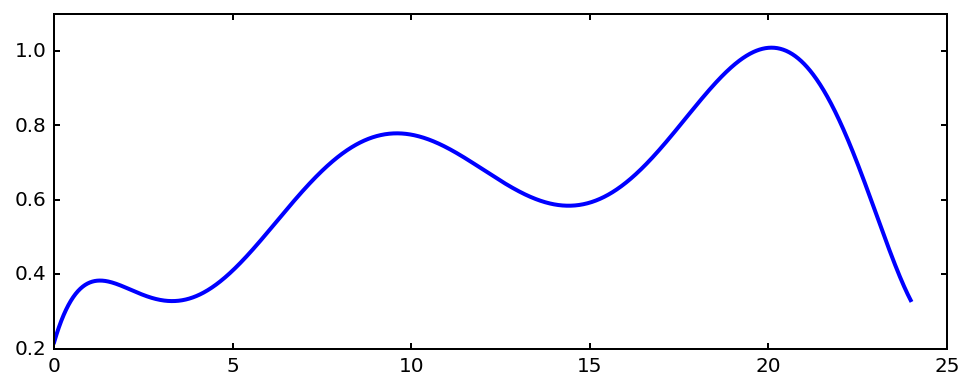

In [44]:
import pandapower as pp
import pandapower.networks as pn
import pandas as pd

lnet = pn.create_cigre_network_mv()
lnet.bus
pp.runpp(lnet)


vbus = pd.DataFrame(columns=["Bus Voltage 2","V B3"])
pbus = pd.DataFrame(columns=["PEV","PB_EV","PB3"])

print(py(t))

for tt in range(len(py(t))):
    #print(2*py(tt))
    pp.create_sgen(lnet,2,p_kw=200*py(tt),q_kvar=0)
    #pp.runpp(lnet)
    vbus.loc[tt] = [lnet.res_bus.vm_pu.at[12],lnet.res_bus.vm_pu.at[3]]
    
pl.figure(1)
pl.plot(t,py(t),lw=2)